In [84]:
# Import necessary tools

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [85]:
# check name of the file
!ls

NLP_Monday_Lab.ipynb                   Womens Clothing E-Commerce Reviews.csv


In [86]:
# set up data set

clothing = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [87]:
clothing.columns = clothing.columns.str.lower().str.replace(' ','-')

In [88]:
clothing.head()

,unnamed:-0,clothing-id,age,title,review-text,rating,recommended-ind,positive-feedback-count,division-name,department-name,class-name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [89]:
# creating a subset & basic EDA

clothing_columns = clothing[['title', 'review-text', 'rating', 'division-name', 'department-name']]

In [90]:
clothing_columns.shape

(23486, 5)

In [91]:
clothing_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review-text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division-name    23472 non-null  object
 4   department-name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [92]:
clothing_columns.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [93]:
# create groupby for ratings

clothing_grouped = clothing_columns.groupby(["division-name", "department-name"], as_index = False, dropna = True).mean()

In [94]:
clothing_grouped

,division-name,department-name,rating
0,General,Bottoms,4.268686
1,General,Dresses,4.163003
2,General,Jackets,4.240310
3,General,Tops,4.148749
4,General,Trend,3.822917
5,General Petite,Bottoms,4.329356
6,General Petite,Dresses,4.133256
7,General Petite,Intimate,4.240343
8,General Petite,Jackets,4.304910
9,General Petite,Tops,4.216469


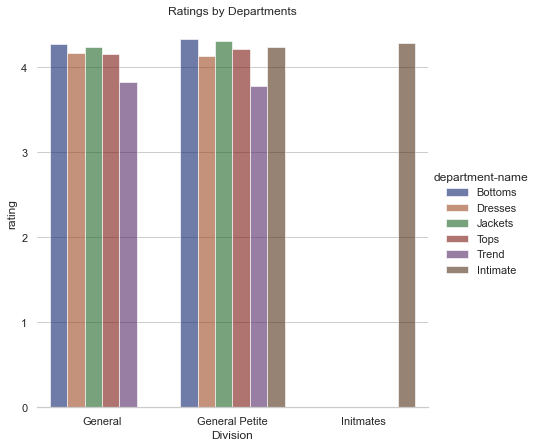

In [95]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=clothing_grouped, kind="bar",
    x = "division-name", y = "rating", hue = "department-name",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Division")
g.set(title = 'Ratings by Departments');


In [96]:
# drop rows for null values in review-text column

clothing_columns = clothing_columns[clothing_columns['review-text'].notna()]

In [97]:
clothing_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review-text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division-name    22628 non-null  object
 4   department-name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [98]:
clothing_columns.head()

,title,review-text,rating,division-name,department-name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [82]:
# split into sentences

from nltk.tokenize import sent_tokenize

token = clothing_columns['review-text'].apply(lambda x: sent_tokenize(x))



In [66]:
token

0        [Absolutely wonderful - silky and sexy and com...
1        [Love this dress!, it's sooo pretty., i happen...
2        [I had such high hopes for this dress and real...
3        [I love, love, love this jumpsuit., it's fun, ...
4        [This shirt is very flattering to all due to t...
                               ...                        
23481    [I was very happy to snag this dress at such a...
23482    [It reminds me of maternity clothes., soft, st...
23483    [This fit well, but the top was very see throu...
23484    [I bought this dress for a wedding i have this...
23485    [This dress in a lovely platinum is feminine a...
Name: review-text, Length: 22641, dtype: object

In [18]:
# apply lambda function to create a column with sentiment scores

clothing_columns['sentiment'] = clothing_columns['review-text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [19]:
clothing_columns.head()

,title,review-text,rating,division-name,department-name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [41]:
# group by minimun sentiment polarity

min_sentiment = clothing_columns.groupby(["division-name", "department-name"], as_index = False, dropna = True).min('sentiment')

In [31]:
sorted1 = min_sentiment.sort_values('sentiment', ascending = False)

In [21]:
min_sentiment

,division-name,department-name,rating,sentiment
0,General,Bottoms,1,-0.533333
1,General,Dresses,1,-0.916667
2,General,Jackets,1,-0.750000
3,General,Tops,1,-0.975000
4,General,Trend,1,-0.270833
5,General Petite,Bottoms,1,-0.257778
6,General Petite,Dresses,1,-0.400000
7,General Petite,Intimate,1,-0.575000
8,General Petite,Jackets,1,-0.562500
9,General Petite,Tops,1,-0.700000


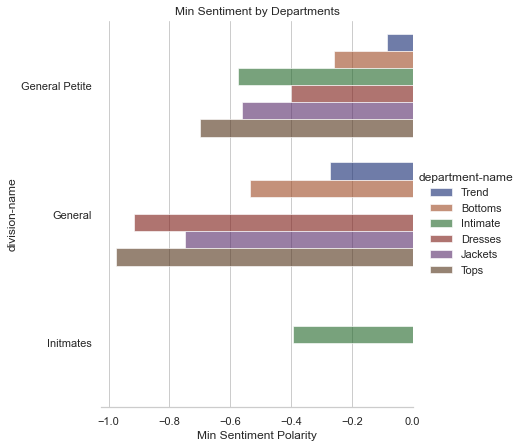

In [32]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data = sorted1, kind="bar",
    x = "sentiment", y = "division-name", hue = "department-name",
    ci="sd", palette="dark", alpha=.6, height=6, orient = "h",
    #order = min_sentiment.sort_values('sentiment', ascending = True)
)
g.despine(left=True)
g.set_axis_labels("Min Sentiment Polarity")
g.set(title = 'Min Sentiment by Departments');


In [23]:
# group by average sentiment polarity

avg_sentiment = clothing_columns.groupby(["division-name", "department-name"], as_index = False, dropna = True).mean('sentiment')

In [24]:
avg_sentiment

,division-name,department-name,rating,sentiment
0,General,Bottoms,4.260727,0.245849
1,General,Dresses,4.150318,0.251091
2,General,Jackets,4.225962,0.237141
3,General,Tops,4.136778,0.247025
4,General,Trend,3.852632,0.203986
5,General Petite,Bottoms,4.315226,0.259258
6,General Petite,Dresses,4.122328,0.248380
7,General Petite,Intimate,4.242291,0.239517
8,General Petite,Jackets,4.301587,0.241773
9,General Petite,Tops,4.197520,0.256835


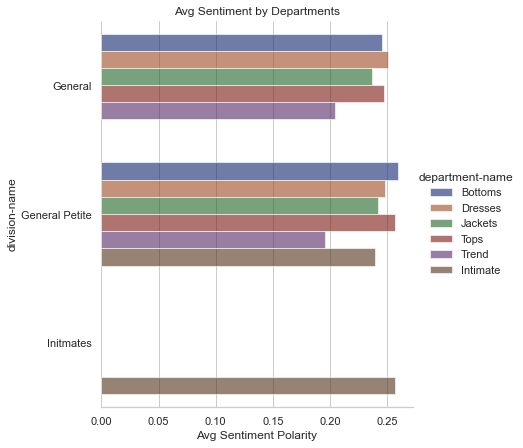

In [25]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data = avg_sentiment, kind="bar",
    x = "sentiment", y = "division-name", hue = "department-name",
    ci="sd", palette="dark", alpha=.6, height=6, orient = "h",
    order = min_sentiment.sort_values('sentiment', ascending = False)
)
g.despine(left=True)
g.set_axis_labels("Avg Sentiment Polarity")
g.set(title = 'Avg Sentiment by Departments');
